Importing Libraries

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

Importing Data

In [257]:
df = pd.read_json('loan_data.json')
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


Summary of Dataset

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


Checking for Duplicated records

In [259]:
if df.duplicated().sum() == 0:
    print('There are no duplicated records')

There are no duplicated records


Q.1- % of total applicants for each unique value of dependents.

In [260]:
# Percentage of applicants where dependents are [0,1,2,3+]
def dep_app(number_of_dependents):
    a = 100 * (df[df['Dependents'] == number_of_dependents].shape[0] / df.shape[0])
    return round(a,2)
for i in df.Dependents.unique().tolist():
    print('Applicants with {0} dependents are {1}%'.format(i,(dep_app(i))))

Applicants with 0 dependents are 57.53%
Applicants with 1 dependents are 16.63%
Applicants with 2 dependents are 17.22%
Applicants with 3+ dependents are 8.61%


Q.2- % of applications approved for self-employed applicants.

In [261]:
self_approved = 100 * (df[(df['Self_Employed'] == 'Yes') & (df['Application_Status'] == 'Y')].shape[0] / df[df['Self_Employed'] == 'Yes'].shape[0])
print('Self Employed Applicants are {0}%'.format(round(self_approved,2)))

Self Employed Applicants are 65.71%


Q.3- % of rejections for married male applicants.

In [262]:
mar_male_rej = 100 * (df[(df['Married'] == 'Yes') & (df['Gender'] == 'Male') & (df['Application_Status'] == 'N')].shape[0] / df[(df['Married'] == 'Yes') & \
    (df['Gender'] == 'Male')].shape[0])
print('Married male rejections percentage is {0}%'.format(round(mar_male_rej,2)))

Married male rejections percentage is 28.43%


Q.4- Which property area has the maximum approval ratio.

In [263]:
def property_approval_rate(Property):
    a = 100 * (df[((df['Property_Area'] == Property) & (df['Application_Status'] == 'Y'))].shape[0] / df[df['Property_Area'] == Property].shape[0])
    return round(a,2)
dict = {}
for i in df.Property_Area.unique().tolist():
    print('{0} have {1}% approval ratio.'.format(i,(property_approval_rate(i))))
    dict[i] = [property_approval_rate(i)]
print('{0} has maximum approval ratio'.format(max(dict, key=dict.get)))

Urban have 63.03% approval ratio.
Rural have 60.4% approval ratio.
Semiurban have 77.66% approval ratio.
Semiurban has maximum approval ratio


Q.5- Average number of dependents per income group.

In [288]:
df_copy = df.copy()
df_copy['dep'] = pd.to_numeric(df_copy['Dependents'], errors='coerce')
df_copy.dep.fillna(3.0, inplace=True)
print('Average number of dependents per income group are')
print(df_copy.groupby(by='Income')['dep'].mean().round(2))

Average number of dependents per income group are
Income
high      0.89
low       0.64
medium    0.92
Name: dep, dtype: float64


Q.6- Approval ratio for various combinations of Property_Area and Marrital status

In [267]:
def app(area, marrital_status):
    number_of_applicants = df[(df['Property_Area'] == area) & (df['Married'] == marrital_status)].shape[0]
    return number_of_applicants
def app_ratio(area, marrital_status):
    approval_ratio = 100 * (df[(df['Property_Area'] == area) & (df['Married'] == marrital_status) & (df['Application_Status'] == 'Y')]).shape[0] \
        / df[(df['Property_Area'] == area) & (df['Married'] == marrital_status)].shape[0]
    return round(approval_ratio,2)
d = {'Property_Area': ['Rural', 'Rural', 'Urban', 'Urban'], 'Marrital Status': ['Married', 'Unmarried', 'Married', 'Unmarried'], '# of Applicants': [app('Rural', 'Yes'),\
 app('Rural', 'No'), app('Urban', 'Yes'), app('Urban', 'No')], 'Approval Ratio': [app_ratio('Rural', 'Yes'), app_ratio('Rural', 'No'), app_ratio('Urban', 'Yes'),\
     app_ratio('Urban', 'No')]}
tab = pd.DataFrame(data=d)
tab

,Property_Area,Marrital Status,# of Applicants,Approval Ratio
0,Rural,Married,93,60.22
1,Rural,Unmarried,56,60.71
2,Urban,Married,109,67.89
3,Urban,Unmarried,56,53.57


Q.7- A simple predictive model to assess whether a loan application will be approved or rejected and its accuracy score.

In [268]:
# All columns
df.columns.values

array(['Application_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Income',
       'Application_Status'], dtype=object)

In [269]:
# All categorical columns
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Income']

# dropping unneccesary column
df1 = df.drop(columns=['Application_ID'])
df1.columns.values

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Income', 'Application_Status'],
      dtype=object)

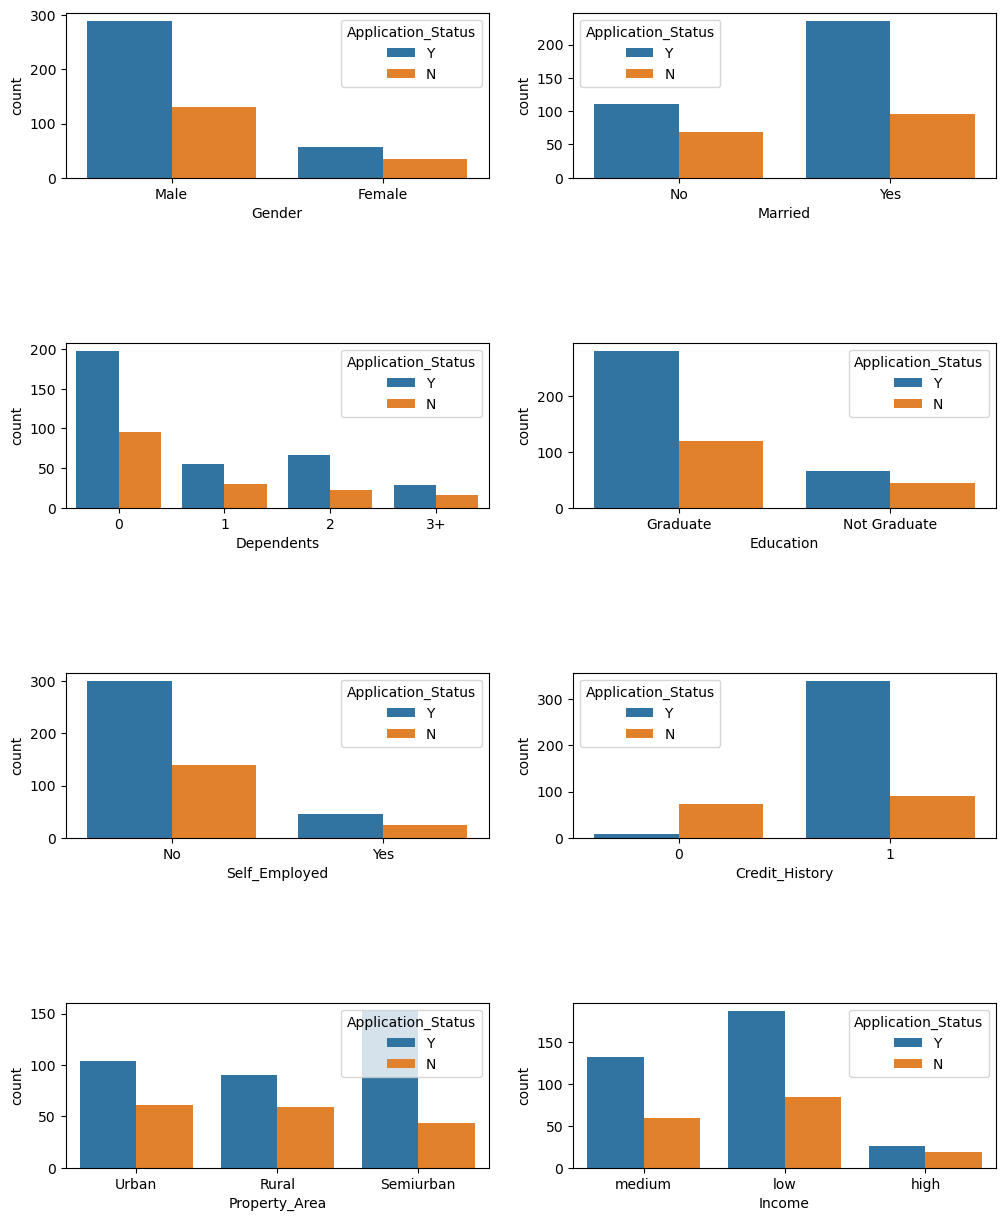

In [270]:
# EDA of the data
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_col):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df1,hue='Application_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [271]:
df1_encoded = pd.get_dummies(df1, drop_first=True)
df1_encoded.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Income_low,Income_medium,Application_Status_Y
0,1,1,0,0,0,0,0,0,0,1,0,1,1
1,1,1,1,1,0,0,0,0,0,0,0,1,0
2,1,1,1,0,0,0,0,1,0,1,1,0,1
3,1,1,1,0,0,0,1,0,0,1,1,0,1
4,1,1,0,0,0,0,0,0,0,1,0,1,1


In [272]:
# Establish target and feature fields
y = df1_encoded['Application_Status_Y']
X = df1_encoded.drop('Application_Status_Y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [273]:
# Initialize model
log_reg = LogisticRegression(random_state=2)

# Train the model and make predictions
log_reg.fit(X_train, y_train)
y_logpred = log_reg.predict(X_test)

# Print the results
print("Accuracy_Score = {}".format(metrics.accuracy_score(y_test, y_logpred)))
print(classification_report(y_test, y_logpred, digits=3))

Accuracy_Score = 0.828125
              precision    recall  f1-score   support

           0      0.889     0.444     0.593        36
           1      0.818     0.978     0.891        92

    accuracy                          0.828       128
   macro avg      0.854     0.711     0.742       128
weighted avg      0.838     0.828     0.807       128

